# Визуализация в Pandas

### Подготовка к работе

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd

In [3]:
# Загружаем данные в Pandas
wines = pd.read_csv('data/Red.csv').head(100)

### Просмотр данных
Сейчас мы попробуем получить самую необходимую инормацию о наших данных с помощью методов pandas.

In [4]:
# Смотрим на данные
wines.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


Для того чтобы понимать что содержится внутри нашего датафрейма мы можем отобразить основные метрики: персентили, максимумы и минимумы, среднее значение и т.д.

In [5]:
# Посмотрим на числовые данные чуть подробнее
wines[['Rating', 'NumberOfRatings', 'Price', 'Year']].describe()

,Rating,NumberOfRatings,Price,Year
count,100.000000,100.000000,100.000000,100.000000
mean,3.860000,337.810000,34.464000,2015.240000
std,0.309773,401.635739,71.001396,2.674685
min,2.900000,100.000000,4.750000,2005.000000
25%,3.700000,100.750000,9.500000,2014.750000
50%,3.850000,101.000000,16.775000,2016.000000
75%,4.100000,1000.000000,31.375000,2017.000000
max,4.600000,1025.000000,633.620000,2019.000000


### Стилизация датафрейма
Pandas умеет отображать данные c использованием пользовательских настроек. Это может пригодиться для более удобного визуального анализа данных или для составления красивых отчётов.   
У параметра style много настроек, подробнее про него можно почитать в официальной документации: https://pandas.pydata.org/docs/user_guide/style.html

Как мы увидим ниже, style без настроек отобразит нам датафрейм почти в неизменном виде. 
Единственное отличие - дробные числа будут иметь гораздо больше знаков после запятой.

In [11]:
# Базовая стилизация
wines.style

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.200000,100,95.000000,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.300000,100,15.500000,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.900000,100,7.450000,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.500000,100,8.720000,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.900000,100,29.150000,2016
5,Gigondas (Nobles Terrasses) 2017,France,Gigondas,Vieux Clocher,3.700000,100,19.900000,2017
6,Marion's Vineyard Pinot Noir 2016,New Zealand,Wairarapa,Schubert,4.000000,100,43.870000,2016
7,Red Blend 2014,Chile,Itata Valley,Viña La Causa,3.900000,100,17.520000,2014
8,Chianti 2015,Italy,Chianti,Castello Montaùto,3.600000,100,10.750000,2015
9,Tradition 2014,France,Minervois,Domaine des Aires Hautes,3.500000,100,6.900000,2014


Метод format позволяет нам настроить отображение данных. Таким образом мы вернём удобное для нас количество десятичных знаков.

In [12]:
# Добавим форматирование, чтобы всё отображалось как раньше (используем классический синтаксис питона для форматирования строк)
res = wines.style.format(formatter={'Rating': "{:.1f}", 'Price': "{:.2f}"})
res

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016
5,Gigondas (Nobles Terrasses) 2017,France,Gigondas,Vieux Clocher,3.7,100,19.90,2017
6,Marion's Vineyard Pinot Noir 2016,New Zealand,Wairarapa,Schubert,4.0,100,43.87,2016
7,Red Blend 2014,Chile,Itata Valley,Viña La Causa,3.9,100,17.52,2014
8,Chianti 2015,Italy,Chianti,Castello Montaùto,3.6,100,10.75,2015
9,Tradition 2014,France,Minervois,Domaine des Aires Hautes,3.5,100,6.90,2014


Нам вероятно захочется отметить некоторые особо примечательные значения в нашем датафреме. Для этого мы можем использовать встронные функции для наиболее популярных случаев или применить кастомное оформление.  
Подробнее о встроенных функциях можно почитать в документации: https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.html

In [9]:
# Здесь мы подсвечиваем максимальные значения во всех столбцах
wines.style.highlight_max(axis=0)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.200000,100,95.000000,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.300000,100,15.500000,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.900000,100,7.450000,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.500000,100,8.720000,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.900000,100,29.150000,2016
5,Gigondas (Nobles Terrasses) 2017,France,Gigondas,Vieux Clocher,3.700000,100,19.900000,2017
6,Marion's Vineyard Pinot Noir 2016,New Zealand,Wairarapa,Schubert,4.000000,100,43.870000,2016
7,Red Blend 2014,Chile,Itata Valley,Viña La Causa,3.900000,100,17.520000,2014
8,Chianti 2015,Italy,Chianti,Castello Montaùto,3.600000,100,10.750000,2015
9,Tradition 2014,France,Minervois,Domaine des Aires Hautes,3.500000,100,6.900000,2014


In [17]:
# При помощи метода applymap мы можем задать намного более сложную подсветку на основе значений
def highlight_cols(val):
    if val < 200:
        color = 'red'
    elif val > 1000:
        color = 'green'
    else:
        color = None
    return 'background-color: %s' % color

wines.style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['NumberOfRatings']])

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.200000,100,95.000000,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.300000,100,15.500000,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.900000,100,7.450000,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.500000,100,8.720000,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.900000,100,29.150000,2016
5,Gigondas (Nobles Terrasses) 2017,France,Gigondas,Vieux Clocher,3.700000,100,19.900000,2017
6,Marion's Vineyard Pinot Noir 2016,New Zealand,Wairarapa,Schubert,4.000000,100,43.870000,2016
7,Red Blend 2014,Chile,Itata Valley,Viña La Causa,3.900000,100,17.520000,2014
8,Chianti 2015,Italy,Chianti,Castello Montaùto,3.600000,100,10.750000,2015
9,Tradition 2014,France,Minervois,Domaine des Aires Hautes,3.500000,100,6.900000,2014


### ПРАКТИКА (5 мин)

1. Добавить перед ценой (Price) знак доллара ($10.25)
2. Для столбца Year подсветить года в промежутке с 2010 по 2015
3. Для столбцов Country и Region подсветить синим все слова, которые содержат ровно 6 букв. Зелёным - те, в которых букв больше и красным - те, в которых букв меньше.

P.S. Смело используйте шпаргалку и документацию

In [22]:
def highlight_cols(row):
    if len(row) == 6:
        color = 'blue'
    elif len(row) > 6:
        color = 'green'
    else:
        color = 'red'
    return 'background-color: %s' % color


styler = wines.style.format(formatter={'Price': '${:.1f}'})
styler = styler.highlight_between(
    subset=pd.IndexSlice[:, ['Year']],
    left=2010,
    right=2015
)

styler = styler.applymap(
    highlight_cols,
    subset=pd.IndexSlice[:, ['Country', 'Region']]
)
styler

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.200000,100,$95.0,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.300000,100,$15.5,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.900000,100,$7.5,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.500000,100,$8.7,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.900000,100,$29.1,2016
5,Gigondas (Nobles Terrasses) 2017,France,Gigondas,Vieux Clocher,3.700000,100,$19.9,2017
6,Marion's Vineyard Pinot Noir 2016,New Zealand,Wairarapa,Schubert,4.000000,100,$43.9,2016
7,Red Blend 2014,Chile,Itata Valley,Viña La Causa,3.900000,100,$17.5,2014
8,Chianti 2015,Italy,Chianti,Castello Montaùto,3.600000,100,$10.8,2015
9,Tradition 2014,France,Minervois,Domaine des Aires Hautes,3.500000,100,$6.9,2014


### Pandas и Matplotlib
Pandas умеет строить графики на основе нашего датафрейма. "Под капотом" он использует Matplotlib. Такой способ подойдет нам для простейшей визуализации. Но для полноценной работы с графиками гораздо удобнее работать напрямую с matplotlib.   
Подробнее про визуализацию: https://pandas.pydata.org/docs/user_guide/visualization.html

<AxesSubplot:>

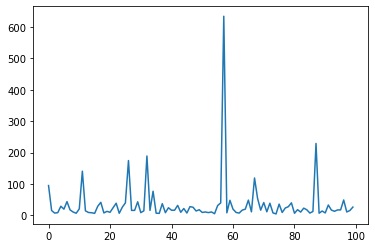

In [23]:
# Строим график с pandas
price = wines['Price']
price.plot()